<img src="imgs/logo-spegc.svg" width=30%>

# Decision Trees

Referencias:
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

http://scott.fortmann-roe.com/docs/BiasVariance.html

Los árboles de decisión son unos de los métodos de aprendizaje supervisado más utilizados. Ofrecen una alta precisión, estabilidad y facilidad de interpretación y pueden resolver problemas tanto de clasificación como regresión. 

## ¿Cómo funcionan?

El árbol de decisión puede operar con variables de entrada y salida tanto categóricas como continuas. La técnica consiste en dividir sucesivamente las muestras en dos o más conjuntos homogéneos utilizando la variable de entrada más diferenciadora.

<img src="images/decision_tree.png" width=30%>

### Ejemplo

Supongamos que somos los dueños de unas instalaciones deportivas donde tenemos pistas de tenis. Creemos que los usuarios juegan al tenis si se dan una serie de condiciones meteorológicas, así que observamos (tomamos muestras) en qué condiciones los usuarios juegan al tenis y en qué condiciones no.

| Muestra |Cielo |Temperatura |Humedad |Viento |Juegan al tenis
|----------------------------------------|
| D1 | Sol | Alta | Alta | Débil | - | 
| D2 | Sol | Alta | Alta | Fuerte | - | 
| D3 | Nubes | Alta | Alta | Débil | + |
| D4 | Lluvia | Suave | Alta | Débil | + |
| D5 | Lluvia | Baja | Normal | Débil | + |
| D6 | Lluvia | Baja | Normal | Fuerte | - |
| D7 | Nubes | Baja | Normal | Fuerte | + |
| D8 | Sol | Suave | Alta | Débil | - |
| D9 | Sol | Baja | Normal | Débil | + |
| D10 | Lluvia | Suave | Normal | Débil | + |
| D11 | Sol | Suave | Normal | Fuerte | + |
| D12 | Nubes | Suave | Alta | Fuerte | + |
| D13 | Nubes | Alta | Normal | Débil | + |
| D14 | Lluvia | Suave | Alta | Fuerte | - |

Tenemos cuatro variables: **Cielo** (Sol, Nubes, Lluvia), **Temperatura** (Alta, Suave, Baja), **Humedad** (Alta, Normal, Baja) y **Viento** (Fuerte, Débil). El número total de combinaciones (muestras) es de: $3\times3\times3\times2 = 162$. Por lo tanto, a partir de una nueva muestra (conjunto de condiciones meteorológicas) no vista antes, deberíamos inferir si nuestros usuarios jugarán al tenis o no.


### Clases de árboles de decisión

Podemos deferenciar dos clases de árboles de decisión basándonos en el tipo de la variable objetivo que tengamos. 

- Árbol de decisión de variable categórica

- Árbol de decisión de variable continua


### Terminología

Veamos la terminología básica utilizada con los árboles de decisión:

- **Root node:** representa una población o muestra completa y esta se divide en dos o más conjuntos homogéneos.
- **Splitting:** proceso de división de un nodo en dos o más subnodos.
- **Decision node:** cuando un subnodo se divide en subnodos adicionales, se denomina nodo de decisión.
- **Leaf node:** Los nodos que no se dividen se denominan nodo hoja o terminal.
- **Prunning:** cuando eliminamos los subnodos de un nodo de decisión, este proceso se denomina poda. Se puede decir proceso opuesto de división.
- **Branch /sub-tree:** una sección del árbol se denomina rama o subárbol.
- **Parent/child node:** un nodo, que se divide en subnodos, se denomina nodo padre y a los nodos que descienden de él, nodos hijos. 

<img src="images/Decision_Tree_2.png" width=60%>

### Ventajas y desventajas de los árboles de decisión
(Wikipedia)


#### Ventajas

- **Fácil de entender e interpretar**. Las personas son capaces de comprender los modelos de árboles de decisión después de una breve explicación.
- **Requiere poca preparación de los datos**. Otras técnicas a menudo requieren la normalización de datos, utilización de variables ficticias necesitan ser creados y valores en blanco deben ser eliminados.
- **Capaz de manejar tanto datos numéricos y categorizados**. Otras técnicas son generalmente especializadas en el análisis de conjuntos de datos que tienen sólo un tipo de variable. (Por ejemplo, las normas de relación sólo se pueden utilizar con variables nominales, mientras que las redes neuronales pueden ser utilizados sólo con variables numéricas.)
- **Utiliza un modelo de caja blanca**. Si una situación dada es observable en un modelo entonces la condición se explica fácilmente por la lógica booleana. (Un ejemplo de un modelo de caja negro es una red neural artificial ya que la explicación de los resultados es difícil de entender.)
- **Es posible validar un modelo utilizando pruebas estadísticas**. Eso hace que sea posible tener en cuenta la fiabilidad del modelo.
- **Robusto**. Se desempeña bien incluso si sus suposiciones son violadas por el verdadero modelo a partir del cual se generaron los datos.
- **Funciona bien con grandes conjuntos de datos**. Grandes cantidades de datos pueden ser analizados utilizando recursos informáticos estándar en un plazo razonable.

#### Desventajas

- **Sobreajuste**. El ajuste excesivo es una de las dificultades más prácticas para los modelos de árbol de decisión. Este problema se resuelve al establecer restricciones en los parámetros del modelo y la poda.

## Algoritmo ID3
```
ID3(Ejemplos, Atributo-objetivo, Atributos)
    1. Si todos los Ejemplos son positivos, devolver un nodo etiquetado con +
    2. Si todos los Ejemplos son negativos, devolver un nodo etiquetado con -
    3. Si Atributos está vacío, devolver un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
    4. En otro caso:
        4.1. Sea A el atributo de Atributos que MEJOR clasifica Ejemplos
        4.2. Crear Árbol, con un nodo etiquetado con A.
        4.3. Para cada posible valor v de A, hacer:
            * Añadir un arco a Árbol, etiquetado con v.
            * Sea Ejemplos(v) el subconjunto de Ejemplos con valor del atributo A igual a v.
            * Si Ejemplos(v) es vacío:
                - Entonces colocar debajo del arco anterior un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
                - Si no, colocar debajo del arco anterior el subárbol ID3(Ejemplos(v), Atributo-objetivo, Atributos-{A}).
        4.4 Devolver Árbol
```

## Criterio para escoger el atributo que mejor clasifica ejemplos

Establecer en cada momento el criterio para elegir qué variable es la que divide mejor las muestras es crítico en este algoritmo. Existen varias aproximaciones al problema.

### Índice Gini

Medimos el grado de "impureza" de una clasificación dada por una de las variables.

$$ Gini(p) =\sum _{i}p_{i}(1-p_{i})=\sum _{i}(p_{i}-{p_{i}}^{2})=\sum _{i}p_{i}-\sum _{i}{p_{i}}^{2}=1-\sum _{i}{p_{i}}^{2} $$


<img src="images/decisiontree.svg" width="150%">

En el ejemplo superior vemos dos clasifiaciones que obtenemos si clasificamos por la $V_1$ (que tiene cuatro posibles valores) o por la variable $V_2$ (que tiene tres posibles valores). Las muestras están etiquetadas en tres categorías (roja, verde y amarilla). ¿Cuál de estas dos variables crea una mejor división?

Calculamos el índice de Gini para cada variable de la siguiente manera:

```
Para cada rama de la división:
    Calcular el porcentaje de muestras con respecto al total
    Para cada clase en la rama:
        Calcular el porcentaje de aparición de muestras de esa clase
        Elevar al cuadrado este porcentaje
    Sumar todos estos porcentajes
    Restar de 1 el resultado de la suma anterior
    Multiplicar el porcentaje de muestras con respecto al total por la suma anterior
    Sumar el índice Gini de cada división
   
```

Veámoslo con el ejemplo de la figura anterior. Los porcentajes de muestras con respecto al total de $V_1$ sería:

$$ W_1 = 5/14 $$
$$ W_2 = 3/14 $$
$$ W_3 = 2/14 $$
$$ W_4 = 4/14 $$

Dentro de cada división calculamos ahora los procentajes de aparición de cada muestra

$$ P_{1,1} = 4/5, P_{1,2} = 0/5, P_{1,3} = 1/5 $$
$$ P_{2,1} = 1/3, P_{2,2} = 1/3, P_{2,3} = 1/3 $$
$$ P_{3,1} = 2/2, P_{3,2} = 0/2, P_{3,3} = 0/2 $$
$$ P_{4,1} = 0/4, P_{4,2} = 1/4, P_{4,3} = 3/4 $$

Elevamos al cuadrado los porcentajes, los sumamos y el resultado lo restamos de $1$. Eso lo hacemos para cada división.

$$ G_1 = 1 - (P_{1,1}^2 + P_{1,2}^2 + P_{1,3}^2) $$
$$ G_2 = 1 - (P_{2,1}^2 + P_{2,2}^2 + P_{2,3}^2) $$
$$ G_3 = 1 - (P_{3,1}^2 + P_{3,2}^2 + P_{3,3}^2) $$
$$ G_4 = 1 - (P_{4,1}^2 + P_{4,2}^2 + P_{4,3}^2) $$

Ahora tenemos cuatro índices de Gini. Multiplicamos cada uno por los pesos $W_i$ que calculamos antes y lo sumamos todo.

$$ G = W_1 \times G_1 + W_2 \times G_2 + W_3 \times G_3 + W_4 \times G_4 $$




### Ganancia de información

Esta medida se basa en el concepto de *entropía*. Intuitivamente vemos que medimos la ausencia de "homegeneidad" de la clasificación. Según la Teoría de la Información, medimos la cantidad media de información (en bits) necesaria para codificar la clasificación de una muestra.

$$I_E(p) = - \sum_{i} {p_i  \cdot log_2(p_i)} $$


En el ejemplo anterior, la entropía de cada división será:

$$ E_1 = -P_{1,1} \cdot log_2(P_{1,1}) -P_{1,2} \cdot log_2(P_{1,2})-P_{1,3} \cdot log_2(P_{1,3}) $$
$$ E_2 = -P_{2,1} \cdot log_2(P_{2,1}) -P_{2,2} \cdot log_2(P_{2,2})-P_{2,3} \cdot log_2(P_{2,3}) $$
$$ E_3 = -P_{3,1} \cdot log_2(P_{3,1}) -P_{3,2} \cdot log_2(P_{3,2})-P_{3,3} \cdot log_2(P_{3,3}) $$
$$ E_4 = -P_{4,1} \cdot log_2(P_{4,1}) -P_{4,2} \cdot log_2(P_{4,2})-P_{4,3} \cdot log_2(P_{4,3}) $$

Por ejemplo, en el caso de $E_1$ el cálculo sería:

$$ E_1 = -\frac{4}{5} \cdot log_2(4/5) -\frac{0}{5} \cdot log_2(0/5) -\frac{1}{5} \cdot log_2(1/5) $$

De la misma forma que en el caso del índice de Gini, la **entropía esperada** para una variable $V$ sería:

$$ E = W_1 \times E_1 + W_2 \times E_2 + W_3 \times E_3 + W_4 \times E_4 $$

Cuanto mayor sea la homogeneidad, menor será el valor de la entropía esperada. La **ganancia de información** la calcularemos como la entropía del nodo padre menos la entropía esperada del nodo hijo.

$$ GI = E(Nodo padre) - E(Nodo hijo) $$

## Puntos de división en variables continuas

Para obtener un punto de división, los valores continuos se ordenan y los puntos medios entre los valores adyacentes se evalúan en términos de alguna métrica, generalmente la ganancia de información o la impureza de Gini. Por ejemplo, digamos que tenemos cuatro muestras y los valores de la variable continua "edad" son $(20,29,40,50)$. Se evalúan los puntos medios $(24.5,34.5,45)$, y la división que proporcione la mejor ganancia de información (o la métrica que esté usando) sobre los datos de entrenamiento es la que se utilizá.

Es posible ahorrar tiempo de cálculo evaluando solo los puntos de división que se encuentran entre los ejemplos de diferentes clases, ya que solo estas divisiones pueden ser óptimas para la ganancia de información.

### Ejercicios

- Calcula el valor Gini para la segunda variable $V_2$.


## Ejemplo 1

Utilizaremos un árbol de decisión para clasificar el dataset Iris.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

<img src="iris.png" width=20%>


In [2]:
print(iris.target_names)
print(iris.feature_names)
print(iris.data[:10])
print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train[:10], y_train[:10])

[[5.2 3.5 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [5.5 2.6 4.4 1.2]
 [6.2 3.4 5.4 2.3]
 [6.7 3.1 4.4 1.4]
 [6.7 2.5 5.8 1.8]
 [4.7 3.2 1.3 0.2]
 [5.1 2.5 3.  1.1]
 [5.  3.3 1.4 0.2]
 [6.4 3.2 4.5 1.5]] [0 0 1 2 1 2 0 1 0 1]


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier()
cross_val_score(dtree, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

## Visualizando el árbol

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

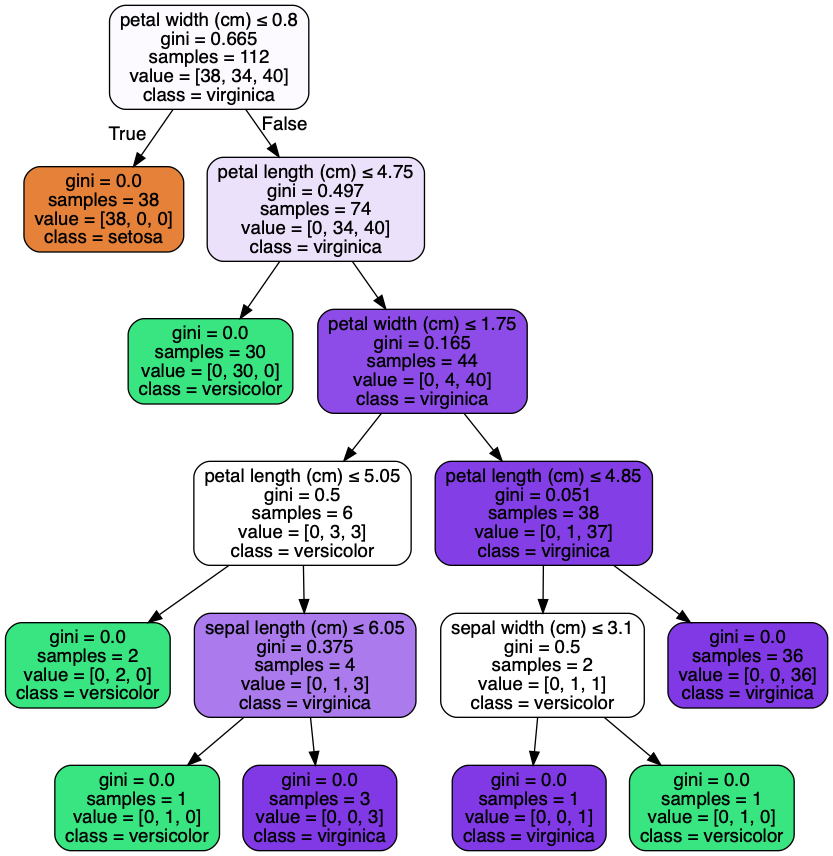

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=iris.feature_names,  
                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
import numpy as np
predictions = dtree.predict(X_test)
acc = np.sum(predictions == y_test)
print("Número de muestras de test:", len(y_test), "Aciertos:", acc)
for x, l, p in zip(X_test, y_test, predictions):
    print(x, l, p)

Número de muestras de test: 38 Aciertos: 36
[4.6 3.4 1.4 0.3] 0 0
[6.  2.2 5.  1.5] 2 1
[6.8 2.8 4.8 1.4] 1 1
[4.6 3.6 1.  0.2] 0 0
[5.7 2.9 4.2 1.3] 1 1
[4.9 2.5 4.5 1.7] 2 1
[5.1 3.8 1.5 0.3] 0 0
[6.4 2.8 5.6 2.1] 2 2
[6.3 2.5 4.9 1.5] 1 1
[5.6 3.  4.5 1.5] 1 1
[6.5 2.8 4.6 1.5] 1 1
[5.1 3.8 1.9 0.4] 0 0
[5.1 3.5 1.4 0.2] 0 0
[5.9 3.  4.2 1.5] 1 1
[6.5 3.  5.5 1.8] 2 2
[5.  2.3 3.3 1. ] 1 1
[6.1 2.9 4.7 1.4] 1 1
[7.4 2.8 6.1 1.9] 2 2
[6.1 2.8 4.7 1.2] 1 1
[5.5 3.5 1.3 0.2] 0 0
[7.2 3.2 6.  1.8] 2 2
[6.  2.9 4.5 1.5] 1 1
[6.9 3.1 5.4 2.1] 2 2
[5.5 4.2 1.4 0.2] 0 0
[5.6 2.5 3.9 1.1] 1 1
[6.7 3.  5.2 2.3] 2 2
[6.6 2.9 4.6 1.3] 1 1
[4.4 3.2 1.3 0.2] 0 0
[5.6 2.8 4.9 2. ] 2 2
[4.6 3.1 1.5 0.2] 0 0
[5.1 3.3 1.7 0.5] 0 0
[5.  3.5 1.3 0.3] 0 0
[6.2 2.9 4.3 1.3] 1 1
[6.6 3.  4.4 1.4] 1 1
[6.2 2.8 4.8 1.8] 2 2
[5.8 4.  1.2 0.2] 0 0
[5.4 3.  4.5 1.5] 1 1
[6.3 2.3 4.4 1.3] 1 1


## Ejemplo 2

Vamos a utilizar los datos de las instalaciones de tenis para crear un árbol de decisión categórico para la predicción.

In [26]:
from numpy import genfromtxt
data = genfromtxt('data/tenis.csv', delimiter=',', dtype='str')

In [57]:
X_data = data[:,:-1]
y_data = data[:,-1]

In [58]:
from sklearn import preprocessing
X_data.shape[1]
le_X = []
dn = []
for c in range(X_data.shape[1]):
    le_X.append(preprocessing.LabelEncoder())
    le_X[c].fit(X_data[:,c])
    dn.append(le_X[c].fit_transform(X_data[:,c]))
print(le_X)
dnnp = np.array(dn).T
print(dnnp)
print(X_data)

le_y = preprocessing.LabelEncoder()
le_y.fit(y_data)

yn = le_y.fit_transform(y_data)
print(yn)

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]
[[2 0 0 0]
 [2 0 0 1]
 [1 0 0 0]
 [0 2 0 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [2 2 0 0]
 [2 1 1 0]
 [0 2 1 0]
 [2 2 1 1]
 [1 2 0 1]
 [1 0 1 0]
 [0 2 0 1]]
[['Sol' ' Alta' ' Alta' ' Débil']
 ['Sol' ' Alta' ' Alta' ' Fuerte']
 ['Nubes' ' Alta' ' Alta' ' Débil']
 ['Lluvia' ' Suave' ' Alta' ' Débil']
 ['Lluvia' ' Baja' ' Normal' ' Débil']
 ['Lluvia' ' Baja' ' Normal' ' Fuerte']
 ['Nubes' ' Baja' ' Normal' ' Fuerte']
 ['Sol' ' Suave' ' Alta' ' Débil']
 ['Sol' ' Baja' ' Normal' ' Débil']
 ['Lluvia' ' Suave' ' Normal' ' Débil']
 ['Sol' ' Suave' ' Normal' ' Fuerte']
 ['Nubes' ' Suave' ' Alta' ' Fuerte']
 ['Nubes' ' Alta' ' Normal' ' Débil']
 ['Lluvia' ' Suave' ' Alta' ' Fuerte']]
[1 1 0 0 0 1 0 1 0 0 0 0 0 1]


In [67]:
clf = DecisionTreeClassifier()
cross_val_score(clf, dnnp, yn, cv=5)

array([0.66666667, 1.        , 1.        , 1.        , 1.        ])

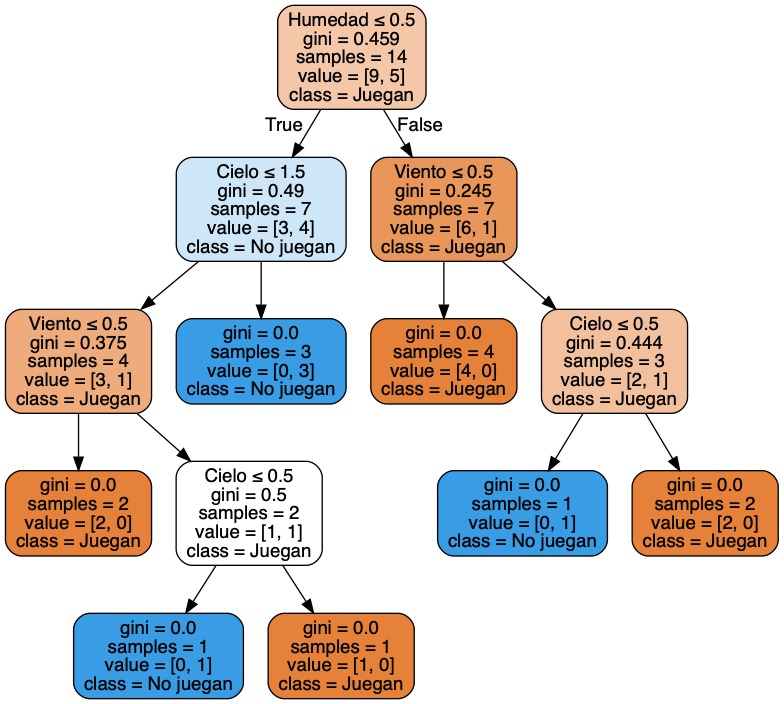

In [75]:
clf.fit(dnnp, yn)

class_names = ['Juegan', 'No juegan']
feature_names = ['Cielo','Temperatura','Humedad','Viento']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
               class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Árboles de decisión como regresores

El algoritmo base para construir árboles de decisión es conocido como ID3 (J. R. Quinlan), que emplea una búsqueda codiciosa de arriba hacia abajo a través del espacio de posibles ramas sin retroceso. El algoritmo ID3 se puede usar para construir un árbol de decisión para la regresión al reemplazar la **ganancia de información** por la **reducción de desviación estándar**.

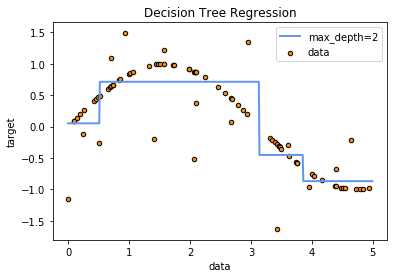

In [90]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Ejercicios

Utilizar un árbol de decisión para estudiar la probabilidad de una persona de sobrevivir a un naufragio como el del Titanic. <a href="data/Titanic/all.zip">Dataset</a>